# Proyek Analisis Data: [Bike Sharing Dataset]



*   **Nama**: Nayma Alaydia
*   **Email**: naymaalaydia@gmail.com
*   **ID Dicoding** : MC322D5X1087

# Menentukan Pertanyaan Bisnis

*   Bagaimana perbedaan jumlah penyewaan sepeda di setiap musim?
*   Apakah kecepatan angin memengaruhi jumlah penyewaan?
*   Apakah ada perbedaan jumlah penyewaan sepeda antara pengguna kasual dan pengguna terdaftar?




# Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Data Wrangling

# Gathering Data

In [2]:
!pip install kaggle
import os
import pandas as pd

# Assuming you have a Kaggle API token and have set up the Kaggle configuration
os.environ['KAGGLE_USERNAME'] = "your_kaggle_username" # replace with your kaggle username
os.environ['KAGGLE_KEY'] = "your_kaggle_api_key" # replace with your kaggle api key


# Download the dataset using the Kaggle API
!kaggle datasets download -d lakshmi25npathi/bike-sharing-dataset --unzip --file day.csv

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset
License(s): unknown
  0% 0.00/56.2k [00:00<?, ?B/s]
100% 56.2k/56.2k [00:00<00:00, 939kB/s]


In [3]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#Assesssing Data

Menilai tabel day_df

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight**:


*   Ada beberapa variabel yang tidak sesuai dengan tipe datanya, seperti dteday, working, holiday, yr, weathersit, dan season.



Melihat Missing Data

In [5]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**Insight**:


*   Melihat missing value data masing-masing varibael, dan tidak ada missing value di tiap variabelnya.



Melihat Data Duplikasi

In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight**:


*   Melihat data yang duplikasi, karena tidak ada data yang duplikasi maka akan dilanjutkan ke cleaning data.



Mengganti nama variabel

In [7]:
day_df.rename(columns={"dteday": "date", "yr": "year", "mnth": "month", "hr": "hours"}, inplace=True)

**Insight**:


*   Mengganti nama variabel agar lebih menjelaskan.
*   Mengganti variabel dteday menjadi date, yr menjadi year, variabel mnth menjadi month, dan variabel hr menjadi hours.



Analisis Deskriptif Data

In [8]:
day_df.describe()

,instant,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#Cleaning Data

Membersihkan tabel day_df

In [9]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   date        731 non-null    object 
 2   season      731 non-null    int64  
 3   year        731 non-null    int64  
 4   month       731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight**:


*   Tidak ada data kosong, semua variabel memiliki jumlah baris yang sama yaitu 731.



Memperbaiki Tipe Data

In [10]:
datetime_columns = ["date"]
Bool_columns = ["workingday", "year", "holiday"]
str_columns = ["weathersit", "season"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

for column in Bool_columns:
  day_df[column] = day_df[column].astype(bool)

for column in str_columns:
  day_df[column] = day_df[column].astype(str)

**Insight**:


*   Memperbaiki tipe data yang tidak sesuai.
*   Mengganti tipe data variabel dteday menjadi datetime, mengganti variabel workingday, yr, dan holiday menjadi tipe data boolean, dan mengganti variabel weathersit dan season menjadi tipe data string.



In [11]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   date        731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   year        731 non-null    bool          
 4   month       731 non-null    int64         
 5   holiday     731 non-null    bool          
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    bool          
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: bool(3), datetime64[ns]

**Insight**:


*   Semua tipe data pada masing-masing variabel telah sesuai.



#Exploratory Data Analysis (EDA)

# Explore day_df

In [12]:
day_df.describe(include="all")

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731,731.000000,731,731.000000,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2,NaN,2,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3,True,NaN,False,NaN,True,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366,NaN,710,NaN,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,6.519836,NaN,2.997264,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,1.000000,NaN,0.000000,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,4.000000,NaN,1.000000,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,7.000000,NaN,3.000000,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,10.000000,NaN,5.000000,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,12.000000,NaN,6.000000,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [13]:
day_df.groupby("season").cnt.sum()

,cnt
season,
1,471348
2,918589
3,1061129
4,841613


In [14]:
day_df.groupby(by="workingday").agg({
    "cnt": "nunique",
    "windspeed": ["max", "min", "mean", "std"]
})

cnt windspeed                              
           nunique       max       min      mean       std
workingday                                                
False          223  0.507463  0.042304  0.192628  0.078194
True           487  0.441563  0.022392  0.189497  0.077233

In [15]:
day_df.groupby(["holiday"])[["casual", "registered"]].count()

,casual,registered
holiday,,
False,710,710
True,21,21


In [16]:
days_df = day_df
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   date        731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   year        731 non-null    bool          
 4   month       731 non-null    int64         
 5   holiday     731 non-null    bool          
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    bool          
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: bool(3), datetime64[ns]

#Visualization & Explanatory Analysis

# Pertanyaan 1 : Bagaimana perbedaan jumlah penyewaan sepeda di setiap musim?

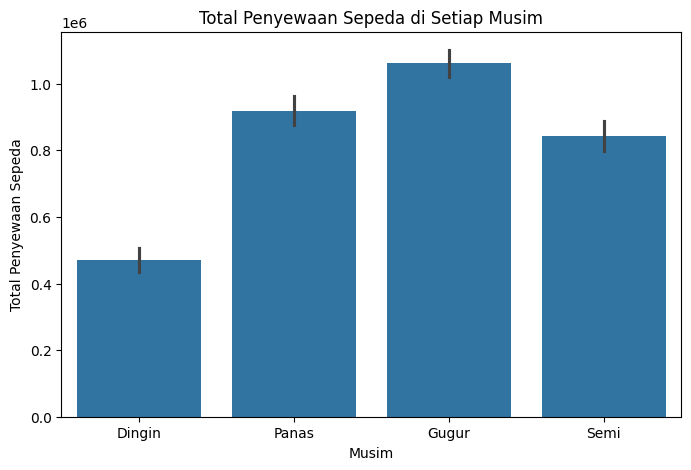

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(x="season", y="cnt", data=day_df, estimator=sum)

plt.xticks(ticks=[0, 1, 2, 3], labels=["Dingin", "Panas", "Gugur", "Semi"])

plt.xlabel("Musim")
plt.ylabel("Total Penyewaan Sepeda")
plt.title("Total Penyewaan Sepeda di Setiap Musim")
plt.show()

Grafik tersebut menunjukkan perbedaan jumlah penyewaan sepeda di setiap musim. Penyewaan tertinggi terjadi pada musim gugur, diikuti oleh musim panas dan semi, sementara musim dingin memiliki jumlah penyewaan terendah. Hal ini menunjukkan bahwa cuaca memengaruhi minat pengguna dalam menyewa sepeda, di mana musim panas dan gugur lebih mendukung aktivitas luar ruangan dibandingkan musim dingin. Meskipun ada sedikit variasi, pola penyewaan tetap terlihat jelas.

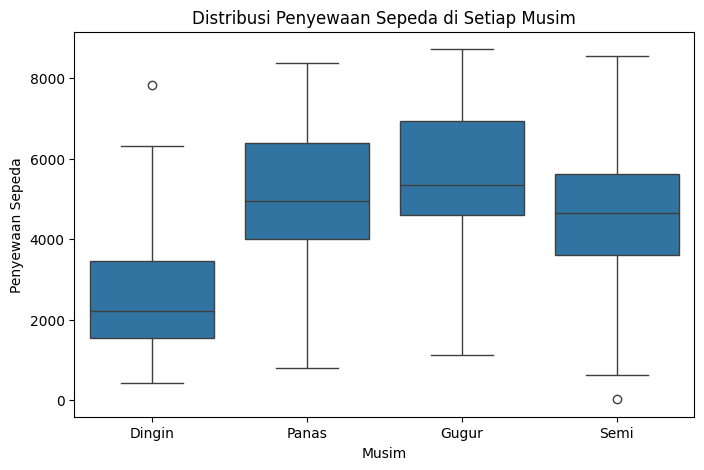

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(x="season", y="cnt", data=day_df)

plt.xticks(ticks=[0, 1, 2, 3], labels=["Dingin", "Panas", "Gugur", "Semi"])
plt.xlabel("Musim")
plt.ylabel("Penyewaan Sepeda")
plt.title("Distribusi Penyewaan Sepeda di Setiap Musim")
plt.show()

Grafik boxplot menunjukkan bahwa penyewaan sepeda bervariasi di setiap musim. Musim dingin memiliki jumlah penyewaan terendah dengan sebaran data yang lebih kecil, sementara musim gugur mencatat jumlah tertinggi dengan median yang lebih besar dibandingkan musim panas dan semi. Beberapa pencilan terlihat, terutama di musim dingin dan semi, yang menandakan adanya hari-hari dengan penyewaan yang berbeda dari pola umum. Secara keseluruhan, penyewaan sepeda lebih banyak terjadi pada musim panas dan gugur dibandingkan musim dingin.

# Pertanyaan 2 : Apakah kecepatan angin memengaruhi jumlah penyewaan?

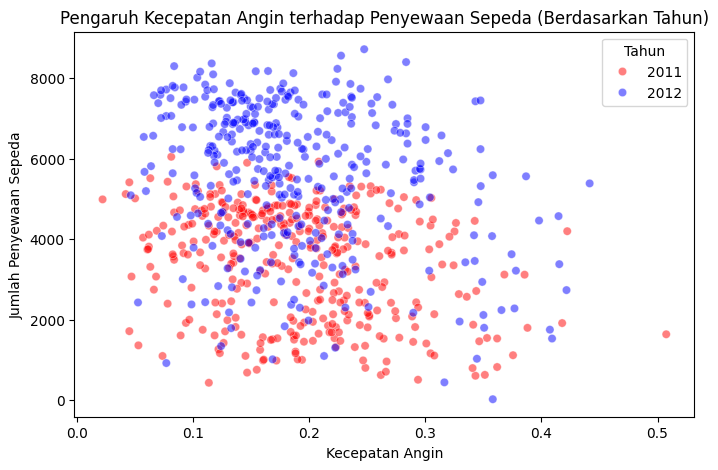

In [19]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="windspeed",
    y="cnt",
    hue="year",
    data=day_df,
    alpha=0.5,
    palette={0: "red", 1: "blue"}  # 2011 = merah, 2012 = biru
)

# Tambahkan label dan judul
plt.xlabel("Kecepatan Angin")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.title("Pengaruh Kecepatan Angin terhadap Penyewaan Sepeda (Berdasarkan Tahun)")

# Perbaiki label legenda agar sesuai dengan tahun
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ["2011", "2012"], title="Tahun")
plt.show()

Berdasarkan scatter plot di atas, kecepatan angin tidak memiliki pengaruh yang signifikan terhadap jumlah penyewaan sepeda. Yang ditunjukkan oleh titik-titik data yang tersebar secara acak tanpa pola yang jelas baik pada tahun 2011 maupun tahun 2012, hal ini menunjukkan bahwa peningkatan atau penurunan kecepatan angin tidak berkorelasi kuat dengan jumlah penyewaan sepeda. Dengan demikian, faktor lain kemungkinan lebih berperan dalam memengaruhi jumlah penyewaan sepeda dibandingkan kecepatan angin.

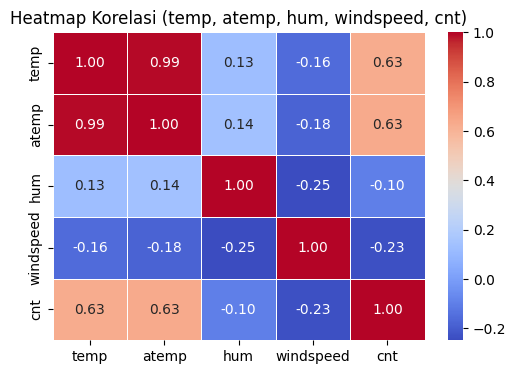

In [33]:
selected_vars = ["temp", "atemp", "hum", "windspeed", "cnt"]
corr_matrix = day_df[selected_vars].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi (temp, atemp, hum, windspeed, cnt)")
plt.show()

Berdasarkan hasil heatmap diatas, dapat dilihat bahwa nilai korelasi kecepatan angin dengan total jumlah sepeda yang disewa relatif kecil dan negatif yaitu sebesar -0.23 yang artinya bahwa apabila kecepatan angin bertambah satu satuan maka total jumlah sepeda yang disewa akan menurun sebesar 0.23 satuan. Dari hasil diatas juga dapat dilihat variabel mana yang paling berpengaruh terhadap total jumlah sepeda yang disewa, yaitu variabel temp dan variabel atemp dengan nilai korelasi masing-masing 0.63 dan positif.

# Pertanyaan 3 : Apakah ada perbedaan jumlah penyewaan sepeda antara pengguna kasual dan pengguna terdaftar?

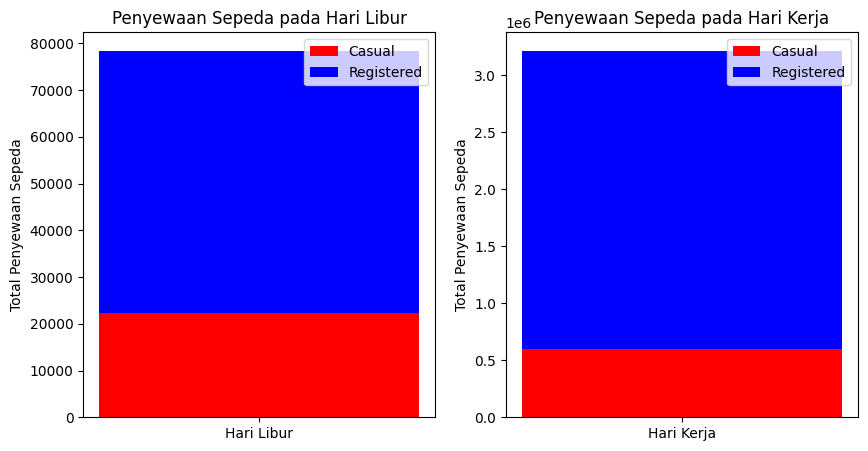

In [21]:
# Memisahkan data untuk hari libur dan hari kerja
holiday_only = day_df[day_df["holiday"] == 1]
working_day_only = day_df[day_df["holiday"] == 0]

# Menghitung total penyewaan sepeda untuk hari libur
total_casual_holiday = holiday_only["casual"].sum()
total_registered_holiday = holiday_only["registered"].sum()

# Menghitung total penyewaan sepeda untuk hari kerja
total_casual_working = working_day_only["casual"].sum()
total_registered_working = working_day_only["registered"].sum()

# Membuat dua subplot untuk hari libur dan hari kerja
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Stacked Bar Chart untuk Hari Libur
ax[0].bar("Hari Libur", total_casual_holiday, label="Casual", color="red")
ax[0].bar("Hari Libur", total_registered_holiday, bottom=total_casual_holiday, label="Registered", color="blue")
ax[0].set_ylabel("Total Penyewaan Sepeda")
ax[0].set_title("Penyewaan Sepeda pada Hari Libur")
ax[0].legend()

# Stacked Bar Chart untuk Hari Kerja
ax[1].bar("Hari Kerja", total_casual_working, label="Casual", color="red")
ax[1].bar("Hari Kerja", total_registered_working, bottom=total_casual_working, label="Registered", color="blue")
ax[1].set_ylabel("Total Penyewaan Sepeda")
ax[1].set_title("Penyewaan Sepeda pada Hari Kerja")
ax[1].legend()
plt.show()

Berdasarkan grafik yang ditampilkan, terdapat perbedaan signifikan dalam jumlah penyewaan sepeda antara pengguna casual dan registered. Pengguna registered mendominasi jumlah penyewaan, terutama pada hari kerja, menunjukkan bahwa mereka lebih cenderung menggunakan sepeda sebagai bagian dari rutinitas harian. Sementara itu, meskipun jumlah penyewaan oleh pengguna casual meningkat pada hari libur, angkanya tetap jauh lebih kecil dibandingkan pengguna registered. Hal ini mengindikasikan bahwa layanan penyewaan sepeda lebih bergantung pada pelanggan tetap, sementara ada peluang untuk meningkatkan keterlibatan pengguna casual, terutama pada hari libur, dengan strategi pemasaran yang lebih menarik.

<ipython-input-22-c7efa2dbedba>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="User Type", y="Total Penyewaan", data=violin_holiday,
<ipython-input-22-c7efa2dbedba>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="User Type", y="Total Penyewaan", data=violin_working,


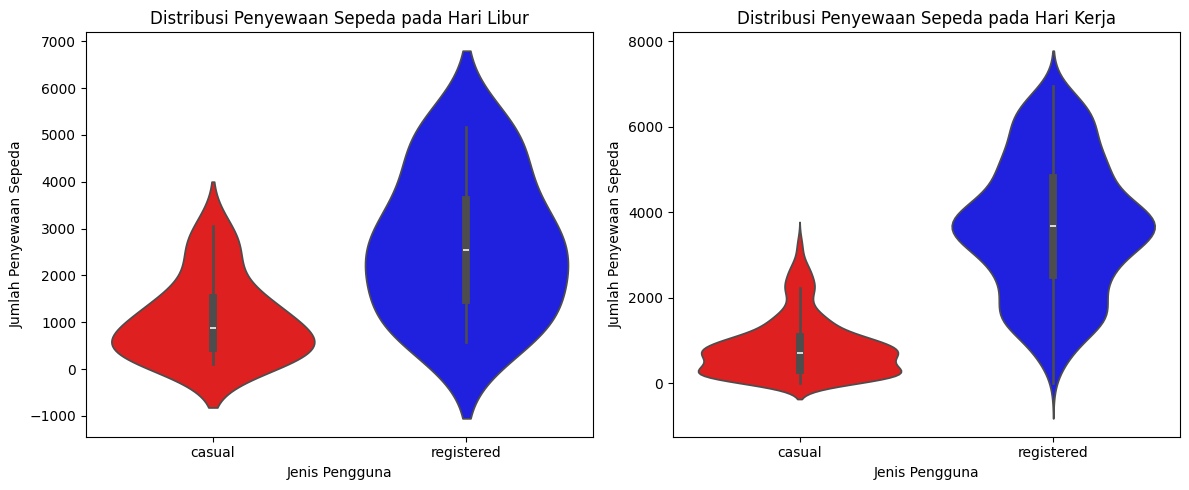

In [22]:
# Mengubah data menjadi format yang sesuai untuk seaborn (Hari Libur)
violin_holiday = holiday_only.melt(id_vars=["holiday"], value_vars=["casual", "registered"],
                                   var_name="User Type", value_name="Total Penyewaan")

# Mengubah data menjadi format yang sesuai untuk seaborn (Hari Kerja)
violin_working = working_day_only.melt(id_vars=["holiday"], value_vars=["casual", "registered"],
                                       var_name="User Type", value_name="Total Penyewaan")

# Membuat dua subplot
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Violin Plot untuk Hari Libur
sns.violinplot(x="User Type", y="Total Penyewaan", data=violin_holiday,
               palette={"casual": "red", "registered": "blue"}, ax=ax[0])
ax[0].set_title("Distribusi Penyewaan Sepeda pada Hari Libur")
ax[0].set_xlabel("Jenis Pengguna")
ax[0].set_ylabel("Jumlah Penyewaan Sepeda")

# Violin Plot untuk Hari Kerja
sns.violinplot(x="User Type", y="Total Penyewaan", data=violin_working,
               palette={"casual": "red", "registered": "blue"}, ax=ax[1])
ax[1].set_title("Distribusi Penyewaan Sepeda pada Hari Kerja")
ax[1].set_xlabel("Jenis Pengguna")
ax[1].set_ylabel("Jumlah Penyewaan Sepeda")
plt.tight_layout()
plt.show()

Grafik violin menunjukkan bahwa jumlah penyewaan sepeda oleh pengguna registered lebih tinggi dibandingkan casual, baik pada hari kerja maupun hari libur. Pada hari kerja, penyewaan oleh registered lebih stabil, menunjukkan penggunaan rutin, sementara casual lebih bervariasi, terutama pada hari libur, yang menandakan penggunaan untuk rekreasi. Terlihat perbedaan signifikan antara kedua kelompok pengguna. Mayoritas penyewaan berasal dari registered, terutama pada hari kerja. Untuk meningkatkan penyewaan, strategi bisa difokuskan pada menarik lebih banyak pengguna casual di hari libur dengan promosi atau insentif, serta meningkatkan kenyamanan bagi registered di hari kerja.

## Analisis Lanjutan

Analisis cluster ini untuk mengelompokkan

In [23]:
# Fungsi untuk mengategorikan kecepatan angin
def categorize_wind(speed):
    if speed <= 0.10:
        return "Rendah", 1
    elif speed <= 0.20:
        return "Sedang", 2
    else:
        return "Kencang", 3

# Terapkan fungsi ke setiap nilai windspeed dan buat dua kolom baru
day_df[['Kategori', 'Cluster']] = day_df['windspeed'].apply(lambda x: pd.Series(categorize_wind(x)))

# Menampilkan hasil dalam bentuk tabel
print(day_df)

     instant       date season   year  month  holiday  weekday  workingday  \
0          1 2011-01-01      1  False      1    False        6       False   
1          2 2011-01-02      1  False      1    False        0       False   
2          3 2011-01-03      1  False      1    False        1        True   
3          4 2011-01-04      1  False      1    False        2        True   
4          5 2011-01-05      1  False      1    False        3        True   
..       ...        ...    ...    ...    ...      ...      ...         ...   
726      727 2012-12-27      1   True     12    False        4        True   
727      728 2012-12-28      1   True     12    False        5        True   
728      729 2012-12-29      1   True     12    False        6       False   
729      730 2012-12-30      1   True     12    False        0       False   
730      731 2012-12-31      1   True     12    False        1        True   

    weathersit      temp     atemp       hum  windspeed  casual

<ipython-input-24-4b95ff759f5b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")


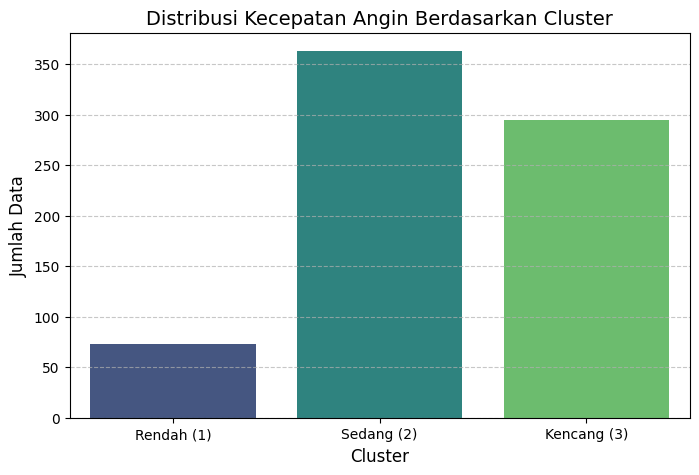

In [24]:
# Hitung jumlah data dalam tiap cluster
cluster_counts = day_df['Cluster'].value_counts().sort_index()

# Plot bar chart menggunakan Matplotlib & Seaborn
plt.figure(figsize=(8,5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")

# Tambahkan label dan judul
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Jumlah Data", fontsize=12)
plt.title("Distribusi Kecepatan Angin Berdasarkan Cluster", fontsize=14)
plt.xticks(ticks=[0,1,2], labels=["Rendah (1)", "Sedang (2)", "Kencang (3)"])
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Tampilkan bar chart
plt.show()

Plot diatas menunjukkan distribusi kecepatan angin dalam tiga klaster yaitu Rendah (1), Sedang (2), dan Kencang (3).Klaster Sedang (2) memiliki jumlah data terbanyak, menunjukkan bahwa kecepatan angin sedang paling sering terjadi. Klaster Kencang (3) berada di urutan kedua, sementara Rendah (1) memiliki jumlah data paling sedikit. Secara keseluruhan, kecepatan angin didominasi oleh kategori Sedang dan Kencang, sedangkan angin rendah jarang terjadi selama tahun 2011 hingga tahun 2012.

# Conclusion




*   Conclusion pertanyaan 1:Bagaimana perbedaan jumlah penyewaan sepeda di setiap musim?

Jumlah penyewaan sepeda bervariasi di setiap musim, dengan musim gugur memiliki penyewaan tertinggi, diikuti oleh musim panas dan semi, sementara musim dingin memiliki penyewaan paling sedikit. Cuaca yang lebih hangat dan nyaman mendorong lebih banyak pengguna untuk menyewa sepeda, sedangkan musim dingin yang lebih ekstrem mengurangi jumlah penyewaan.



*   Conclusion pertanyaan 2: Apakah kecepatan angin memengaruhi jumlah penyewaan?

Tidak, kecepatan angin tidak memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda. Meskipun ada korelasi negatif, nilainya kecil sehingga dampaknya dapat diabaikan. Faktor lain, seperti suhu udara dan suhu terasa, kemungkinan lebih berpengaruh dalam menentukan jumlah penyewaan sepeda.  



*   Conclusion pertanyaan 3: Apakah ada perbedaan jumlah penyewaan sepeda antara pengguna kasual dan pengguna terdaftar?

Ya, terdapat perbedaan signifikan dalam jumlah penyewaan sepeda antara pengguna casual dan registered. Pengguna registered lebih dominan dalam penyewaan, terutama pada hari kerja, sedangkan pengguna casual lebih banyak menyewa pada hari libur, meskipun jumlahnya masih lebih rendah.



#Saran untuk peningkatan pendapatan untuk penyewaan sepeda

Dengan meningkatkan partisipasi pengguna casual di hari libur, mempertahankan loyalitas pengguna registered di hari kerja, dan menyesuaikan layanan dengan kondisi musim, jumlah penyewaan sepeda dapat mengalami peningkatan yang signifikan. Selain itu, strategi ini juga berpotensi meningkatkan pendapatan secara keseluruhan dengan menyasar segmen pengguna yang berbeda pada waktu yang tepat. Upaya pemasaran dapat difokuskan untuk menarik lebih banyak pengguna casual di akhir pekan melalui promosi dan insentif, serta meningkatkan kenyamanan bagi pengguna registered pada hari kerja agar tetap setia menggunakan layanan penyewaan sepeda.

In [32]:
from google.colab import files
days_df.to_csv("Penyewaan_Sepeda.csv", index=False)
files.download("Penyewaan_Sepeda.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>